In [14]:
import numpy as np
import cv2


def feature_representation(image):

    if len(image.shape) == 2:  # 灰度图像
        return image.reshape(-1, 1)
    return image.reshape(-1, 3)  # 彩色图像情况，假设是RGB通道


def calculate_gene_force(image, w_attr=1.0, w_rep=1.0):
    if len(image.shape) > 2:
        height, width, _ = image.shape
        features = feature_representation(image)
    else:
        height, width = image.shape
        features = feature_representation(image)

    # Normalize features
    features = (features - features.mean(axis=0)) / features.std(axis=0)

    total_force = np.zeros(features.shape)

    def get_neighbor_indices(i, j, height, width):
        neighbor_indices = []
        for x in range(max(0, i - 1), min(i + 2, height)):
            for y in range(max(0, j - 1), min(j + 2, width)):
                if (x!= i or y!= j):
                    if len(image.shape) > 2:  # 彩色图像情况
                        neighbor_indices.append(x * width + y)
                    else:  # 灰度图像情况，索引计算方式改变
                        neighbor_indices.append((x * width + y) if (x * width + y) < features.shape[0] else -1)
        return neighbor_indices

    for i in range(height):
        for j in range(width):
            index = i * width + j
            F_attr = np.zeros(features.shape[1])
            F_rep = np.zeros(features.shape[1])
            neighbor_indices = get_neighbor_indices(i, j, height, width)
            for neighbor_index in neighbor_indices:
                if neighbor_index!= -1:  # 跳过无效的索引（灰度图像中超出边界的情况）
                    neighbor_feature = features[neighbor_index]
                    self_feature = features[index]
                    distance = np.linalg.norm(neighbor_feature - self_feature)
                    if distance == 0:
                        distance = 1e-9
                    # Attractive force
                    F_attr += (w_attr / distance) * (neighbor_feature - self_feature)
                    # Repulsive force
                    F_rep += (w_rep / (distance ** 2)) * (self_feature - neighbor_feature)

            total_force[index] = F_attr - F_rep

    return total_force


def edge_strength(total_force):
    return np.linalg.norm(total_force, axis=1)
def adjust_strength_based_on_threshold(strength, global_threshold):
    adjusted_strength = np.copy(strength)
    for i in range(len(strength)):
        if strength[i] < global_threshold:
            adjusted_strength[i] = (global_threshold-strength[i])
        elif strength[i] > global_threshold:
            adjusted_strength[i] = adjusted_strength[i]-global_threshold
    return adjusted_strength

def edge_detection(input_image, weight_attr, weight_rep, threshold_percentage):
    # 计算总的力（可能涉及引力和斥力等的综合计算，具体由calculate_gene_force函数实现）
    total_force = calculate_gene_force(input_image, weight_attr, weight_rep)

    # 根据图像维度处理边缘强度计算
    if len(input_image.shape) > 2:
        # 如果是彩色图像（三维数组），将计算得到的边缘强度重塑为二维，与原图像的高度和宽度对应
        strength = edge_strength(total_force).reshape(input_image.shape[:2])
    else:
        strength = edge_strength(total_force)
    strength=adjust_strength_based_on_threshold(strength.flatten(), np.percentile(strength.flatten(), 80))
    # 计算阈值，取边缘强度从小到大排序后的前threshold_percentage比例位置对应的强度值作为阈值
    strength=strength.reshape(input_image.shape[:2])
    num_elements = strength.size
    num_threshold_elements = int(num_elements * threshold_percentage)
    sorted_strength = np.sort(strength.flatten())
    threshold = sorted_strength[num_threshold_elements - 1]
    sorted_indices = np.argsort(strength.flatten())[(num_threshold_elements - 1):]
    bool_array = np.full_like(strength.flatten(), False, dtype=bool)
    bool_array[sorted_indices] = True
    edges = (strength >= threshold).astype(np.uint8) 


    return edges

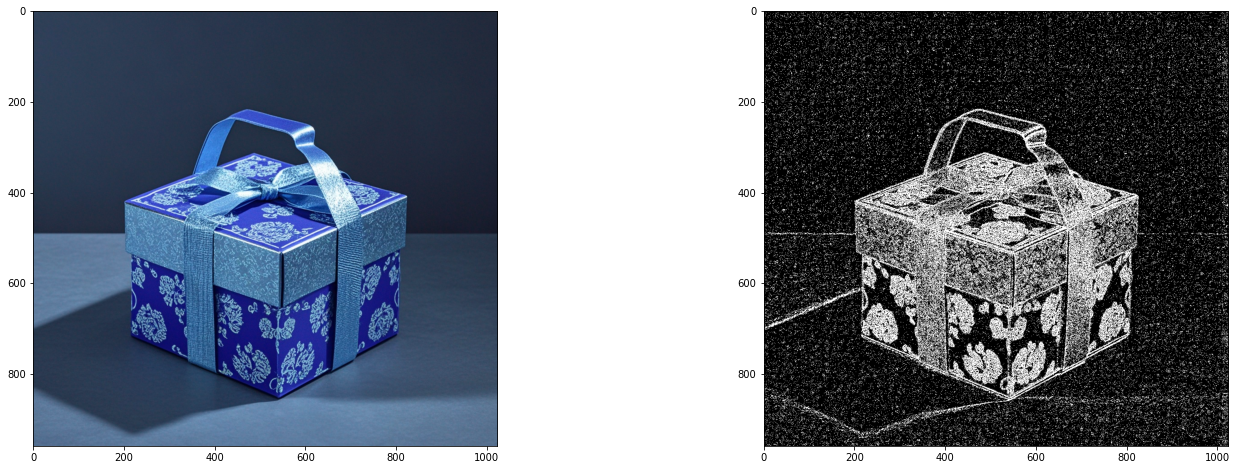

In [15]:
import matplotlib.pyplot as plt
image = cv2.imread("fish.png")
# threshold=np.sort(strength.flatten())[int(0.01*25*len(total_force))-1]
edges = edge_detection(image, 1, 0.5, 0.8)#(strength < threshold).astype(np.uint8)
fig = plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
        #plt.title('Image')
plt.imshow(image)

plt.subplot(1, 2, 2)
        #plt.title('Initial Edge')
plt.imshow(edges,cmap='gray')


plt.show()

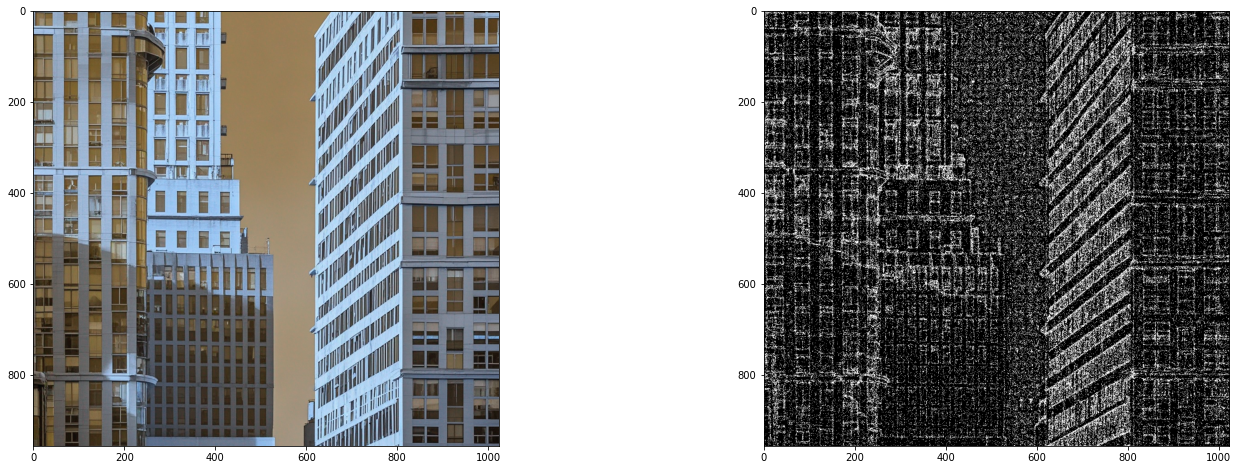

In [16]:
import matplotlib.pyplot as plt
image = cv2.imread("lou.png")
# threshold=np.sort(strength.flatten())[int(0.01*25*len(total_force))-1]
edges = edge_detection(image, 1, 0.5, 0.8)#(strength < threshold).astype(np.uint8)
fig = plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
        #plt.title('Image')
plt.imshow(image)

plt.subplot(1, 2, 2)
        #plt.title('Initial Edge')
plt.imshow(edges,cmap='gray')


plt.show()

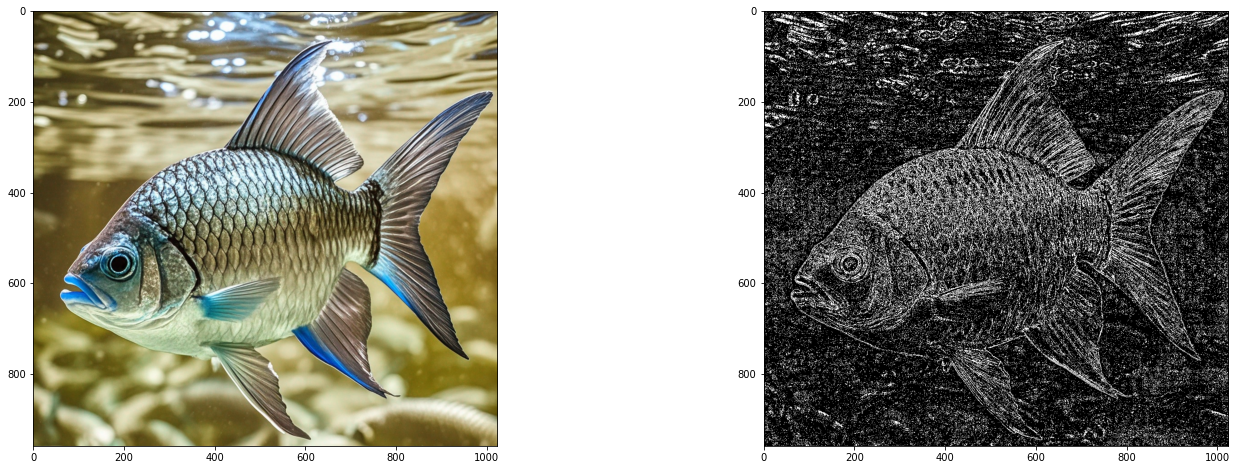

In [17]:
import matplotlib.pyplot as plt
image = cv2.imread("gift.png")
# threshold=np.sort(strength.flatten())[int(0.01*25*len(total_force))-1]
edges = edge_detection(image, 1, 0.5, 0.8)#(strength < threshold).astype(np.uint8)
fig = plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
        #plt.title('Image')
plt.imshow(image)

plt.subplot(1, 2, 2)
        #plt.title('Initial Edge')
plt.imshow(edges,cmap='gray')


plt.show()

In [18]:
import cv2
import numpy as np

# 创建一个简单的有物体的图像（这里以黑色矩形在白色背景为例）
img = np.ones((400, 400, 3), dtype=np.uint8) * 255
cv2.rectangle(img, (100, 100), (300, 300), (0, 0, 0), -1)
# 光照增强，增加像素值
brightened_img = cv2.add(img, np.ones(img.shape, dtype=np.uint8) * 125)
# 光照减弱，降低像素值
darkened_img = cv2.subtract(img, np.ones(img.shape, dtype=np.uint8) * 125)
cv2.imwrite('original_image.jpg', img)
cv2.imwrite('brightened_image.jpg', brightened_img)
cv2.imwrite('darkened_image.jpg', darkened_img)

True

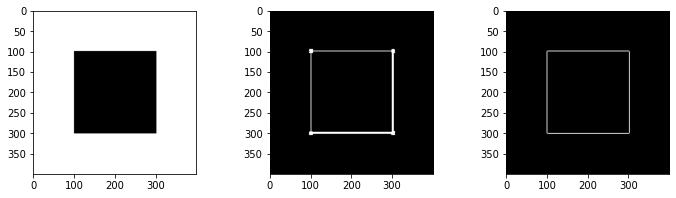

In [22]:
import matplotlib.pyplot as plt
def Sobel(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    return magnitude.astype(np.uint8)
image = cv2.imread("original_image.jpg")
# threshold=np.sort(strength.flatten())[int(0.01*25*len(total_force))-1]
edges = edge_detection(image, 1, 0.5, 0.985)#(strength < threshold).astype(np.uint8)
cleaned_edges=Sobel(image)
fig = plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
        #plt.title('Image')
plt.imshow(image)

plt.subplot(1, 3, 2)
        #plt.title('Initial Edge')
plt.imshow(edges,cmap='gray')

plt.subplot(1, 3, 3)
        #plt.title('Completed Edge')
plt.imshow(cleaned_edges,cmap='gray')
#plt.savefig('Edges_shafa.png')

plt.show()

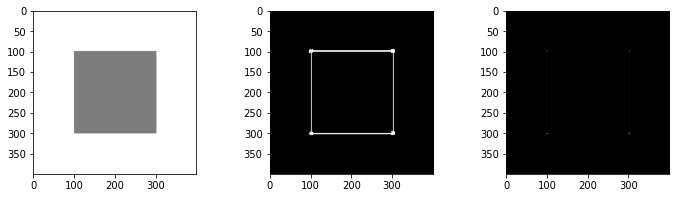

In [20]:
import matplotlib.pyplot as plt
def Sobel(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    return magnitude.astype(np.uint8)
image = cv2.imread("brightened_image.jpg")
# threshold=np.sort(strength.flatten())[int(0.01*25*len(total_force))-1]
edges = edge_detection(image, 1, 0.5, 0.985)#(strength < threshold).astype(np.uint8)
cleaned_edges=Sobel(image)
fig = plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
        #plt.title('Image')
plt.imshow(image)

plt.subplot(1, 3, 2)
        #plt.title('Initial Edge')
plt.imshow(edges,cmap='gray')

plt.subplot(1, 3, 3)
        #plt.title('Completed Edge')
plt.imshow(cleaned_edges,cmap='gray')
#plt.savefig('Edges_shafa.png')

plt.show()

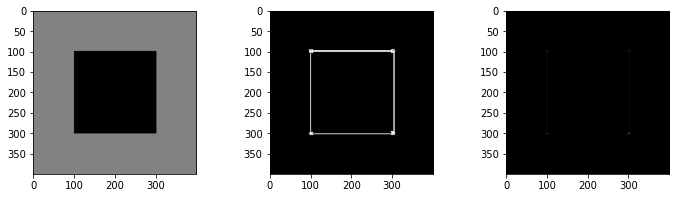

In [21]:
import matplotlib.pyplot as plt
def Sobel(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    return magnitude.astype(np.uint8)
image = cv2.imread("darkened_image.jpg")
# threshold=np.sort(strength.flatten())[int(0.01*25*len(total_force))-1]
edges = edge_detection(image, 1, 0.5, 0.985)#(strength < threshold).astype(np.uint8)
cleaned_edges=Sobel(image)
fig = plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
        #plt.title('Image')
plt.imshow(image)

plt.subplot(1, 3, 2)
        #plt.title('Initial Edge')
plt.imshow(edges,cmap='gray')

plt.subplot(1, 3, 3)
        #plt.title('Completed Edge')
plt.imshow(cleaned_edges,cmap='gray')
#plt.savefig('Edges_shafa.png')

plt.show()